# Name : OM CHIRAGBHAI CHOKSI
### SAMATRIX INTERNSHIP TASK NUMBER WEBSITE DOMAIN 2

### Project Description: Website A/B Testing for Conversion Optimization

This project conducts an A/B testing analysis to compare the conversion rates of two website variants (A and B) with the goal of optimizing user conversions. Using simulated click-through data for 10,000 visitors per variant, with true conversion rates of 10% for Variant A and 12% for Variant B, the project calculates key metrics such as conversion rates and 95% confidence intervals. The analysis employs statistical methods, including a binomial distribution for simulating conversions and a z-test for proportions, to determine if the observed difference in conversion rates is statistically significant. Visualizations and statistical tests are implemented using Python libraries like numpy, pandas, scipy, matplotlib, and seaborn. The project aims to provide actionable insights for improving website performance based on data-driven evidence.

## Website A/B Testing for conversion Optimization

### Import Libraries

In [36]:
import numpy as np , time
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest
from math import ceil

In [37]:
np.random.seed(42)

## 1. Simulate Click-Through Data (Visits vs. Purchases)

In [38]:
# Assume 10,000 visitors each
n_A,p_A=10_000,0.10
n_B,p_B=10_000,0.12

1.   variant B: 12% true conversion
2.   variant A: 10% true conversion



In [39]:
#Simulate  number of purchases
success_A=np.random.binomial(n_A,p_A)
success_B=np.random.binomial(n_B,p_B)



 - data for two variants, A and B, with 10,000 visitors each and true conversion rates of 10% (A) and 12% (B). The simulated conversions are generated using a binomial distribution:

 - Variant A: 10,000 visitors, true conversion rate = 0.10, simulated conversions = 973

 - Variant B: 10,000 visitors, true conversion rate = 0.12, simulated conversions = 1134

## 2. Calculate Conversion Rates and 95% Confidence Intervals

In [40]:
def proportion_ci(successes,n,alpha=0.05):
  p_hat=successes/n
  z=stats.norm.ppf(1-alpha/2)
  se=np.sqrt(p_hat*(1-p_hat)/n)
  return p_hat,p_hat-z*se,p_hat+z*se


- This defines a function proportion_ci to calculate the conversion rate and its confidence interval:

- successes: The number of conversions.

- n: The total number of visitors.
 alpha: The significance level (defaulting to 0.05 for a 95% confidence interval).

- p_hat: The calculated conversion rate (successes / n).

- z: The z-score corresponding to the desired confidence level (e.g., for a 95% CI, you need the z-score that leaves 2.5% in each tail, which is calculated using stats.norm.ppf).

- se: The standard error of the proportion.

- The function returns the conversion rate (p_hat), the lower bound of the confidence interval (p_hat - z*se), and the upper bound (p_hat + z*se).


In [41]:
p_A_hat,ci_low_A,ci_high_A=proportion_ci(success_A,n_A)
p_B_hat,ci_low_B,ci_high_B=proportion_ci(success_B,n_B)
results=pd.DataFrame({
    'Variant':['A','B'],
    'Visitors':[n_A,n_B],
    'Conversions':[success_A,success_B],
    'CR':[p_A_hat,p_B_hat],
    'CI_low':[ci_low_A,ci_low_B],
    'CI_high':[ci_high_A,ci_high_B]
})
results

,Variant,Visitors,Conversions,CR,CI_low,CI_high
0,A,10000,973,0.0973,0.091491,0.103109
1,B,10000,1134,0.1134,0.107185,0.119615


This cell applies the proportion_ci function to your simulated data and displays the results in a pandas DataFrame:

- It calculates the conversion rate and confidence interval for both Variant A and Variant B.
- It creates a DataFrame named results with columns for 'Variant', 'Visitors', 'Conversions', 'CR' (conversion rate), 'CI_low' (lower bound of confidence interval), and 'CI_high' (upper bound of confidence interval).
- Finally, it displays the results DataFrame.

## 3. Plot Conversion Rates with Error Bars

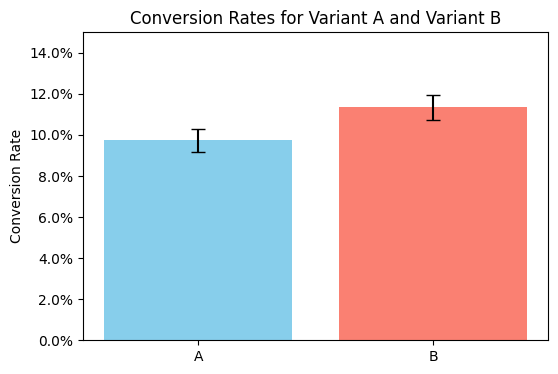

In [42]:
plt.figure(figsize=(6,4))
plt.bar(results['Variant'],
        results['CR'],
        yerr=[
            results['CR'] - results['CI_low'], # Corrected lower error: distance from CR down to CI_low
            results['CI_high'] - results['CR'] # Corrected upper error: distance from CR up to CI_high
        ],
        capsize=5,
        color=['skyblue','salmon'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates for Variant A and Variant B')
plt.ylim(0, 0.15)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))
plt.show()



- This chart shows:

 Bars: Conversion rates for Variants A (9.73%) and B (11.34%).

 Error Bars: 95% confidence intervals for each variant.

 Colors: Skyblue for A, salmon for B (matching the notebook's color scheme).

In [43]:
## Day 4

## Two propotion Z test

h0 - p_b <= p_a vs h1 - p_b > p_a (design test)

The goal is to test whether Variant B has a significantly higher conversion rate than Variant A. The null hypothesis (H0),is that the conversion rates are lessthan or equal(P_a <= P_b),and the alternative hypothesis(H1) is that Variant B’s conversion rate is higher(P_b > P_a),using a one-tailed test.


In [44]:
from statsmodels.stats.proportion import proportions_ztest

In [45]:
count = np.array([success_A , success_B])
nobs = np.array([n_A,n_B])
z_stat , p_value = proportions_ztest(count,nobs,alternative = 'larger')

In [46]:
print(f"Z Statistic : {z_stat:.3f}")
print(f"Z Statistic : {p_value:.3f}")

Z Statistic : -3.708
Z Statistic : 1.000


In [47]:
## condition for hypothesis
if p_value < 0.05:
  print("reject h0 : variante b has a significantly ")
else:
  print("fail to reject h0 : no significante lift from B over A.")

fail to reject h0 : no significante lift from B over A.


## 5 . Real time Monitoring & Sequential Teasting

- Real-time monitoring involves tracking conversion rates as data accumulates and visualizing trends to make informed decisions.


In [48]:
from IPython.display import clear_output

In [49]:
true_a_A , true_a_B = 0.10 , 0.12
batch_size = 100
n_batches = 60

# initializing counter
n_visits_A , n_visits_B = 0 , 0
n_succ_A = 0
n_succ_B = 0

# plotting list
batches = []
p_values = []
observed_lifts = []

This cell initializes variables for the sequential testing simulation:

- true_a_A and true_a_B: The true conversion rates used for simulating data in batches.
- batch_size: The number of visitors simulated in each batch (100).
- n_batches: The total number of batches to simulate (60).
- n_visits_A, n_visits_B: Counters for the total number of visitors for each variant across all batches.
- n_succ_A, n_succ_B: Counters for the total number of conversions for each variant across all batches.
batches, p_values, observed_lifts: Lists to store data for plotting the results of the sequential test.

In [50]:
for batch in range(1, n_batches + 1):
    # Simulate one batch of visitors
    new_A = np.random.binomial(batch_size, true_a_A)
    new_B = np.random.binomial(batch_size, true_a_B)

    # Update totals
    n_visits_A += batch_size
    n_visits_B += batch_size
    n_succ_A += new_A
    n_succ_B += new_B

    # Compute conversion rates and lift
    cr_A = n_succ_A / n_visits_A
    cr_B = n_succ_B / n_visits_B
    lift = cr_B - cr_A

    # Two-proportion z-test (one-sided: B > A)
    count = np.array([n_succ_B, n_succ_A])
    nobs = np.array([n_visits_B, n_visits_A])
    z_stat, p_val = proportions_ztest(count, nobs, alternative='larger')

    # Record for plotting
    batches.append(batch)
    p_values.append(p_val)
    observed_lifts.append(lift)

    # Display live update
    clear_output(wait=True)
    print(f"Batch {batch}/{n_batches}")
    print(f" Variant A: {n_visits_A} visits, {n_succ_A} buys → CR = {cr_A:.3%}")
    print(f" Variant B: {n_visits_B} visits, {n_succ_B} buys → CR = {cr_B:.3%}")
    print(f" Observed lift: {lift:.3%}")
    print(f" z-stat = {z_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("  Significant lift detected (p<0.05).")
    else:
        print(" No significant lift yet.")


Batch 60/60
 Variant A: 6000 visits, 574 buys → CR = 9.567%
 Variant B: 6000 visits, 714 buys → CR = 11.900%
 Observed lift: 2.333%
 z-stat = 4.13, p-value = 0.0000
  Significant lift detected (p<0.05).


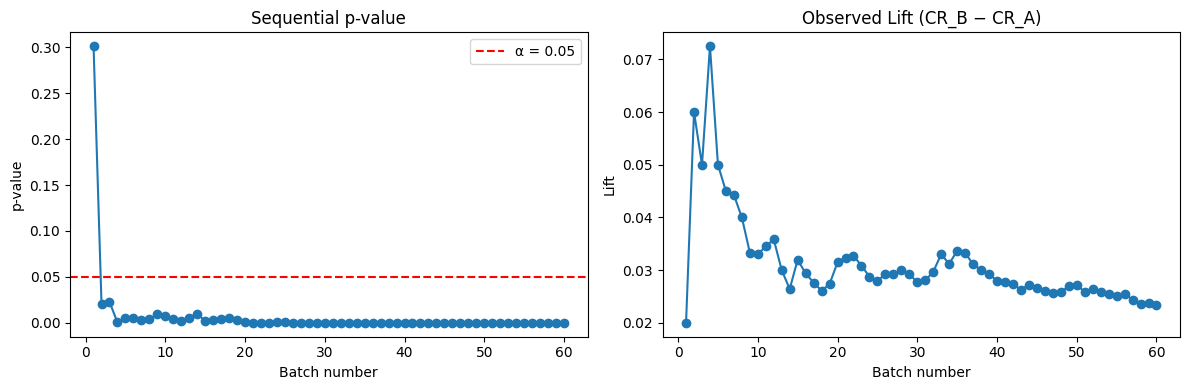

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].plot(batches, p_values, 'o-')
axes[0].axhline(0.05, color='red', linestyle='--', label='α = 0.05')
axes[0].set_title('Sequential p-value')
axes[0].set_xlabel('Batch number')
axes[0].set_ylabel('p-value')
axes[0].legend()

axes[1].plot(batches, observed_lifts, 'o-')
axes[1].set_title('Observed Lift (CR_B − CR_A)')
axes[1].set_xlabel('Batch number')
axes[1].set_ylabel('Lift')

plt.tight_layout()
plt.show()

### Brief Explanation of the Two Curves

**Left Curve (Sequential p-value)**: This plot tracks the p-value over 60 batches in an A/B test. It starts high (~0.30) but drops below the \(\alpha = 0.05\) threshold after the first batch, staying near 0. This indicates a statistically significant difference in conversion rates between Variants A and B early on, suggesting Variant B outperforms A.

**Right Curve (Observed Lift, CR_B - CR_A)**: This shows the difference in conversion rates (lift) between Variant B and A across 60 batches. It starts high (~0.07) with early fluctuations, then stabilizes around 0.02–0.03. This confirms Variant B consistently has a ~2% higher conversion rate than A, matching the simulated true difference (12% vs. 10%).